<a href="https://colab.research.google.com/github/Vignesh-kanna/ml_with_flask/blob/main/Toyoto_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Read the file into a DataFrame
df = pd.read_csv(file_name)

# Display the DataFrame
print(df.head())

Saving Toyoto_Corrola.csv to Toyoto_Corrola.csv
   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

      KM  HP  Doors  Cylinders  Gears  Weight  
0  46986  90      3          4      5    1165  
1  72937  90      3          4      5    1165  
2  41711  90      3          4      5    1165  
3  48000  90      3          4      5    1165  
4  38500  90      3          4      5    1170  


In [ ]:
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [ ]:
df_cleaned = df.drop(columns=["Model"])


In [ ]:
df_cleaned.head()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,13500,23,46986,90,3,4,5,1165
1,2,13750,23,72937,90,3,4,5,1165
2,3,13950,24,41711,90,3,4,5,1165
3,4,14950,26,48000,90,3,4,5,1165
4,5,13750,30,38500,90,3,4,5,1170


In [ ]:
df_cleaned.corr()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         1436 non-null   int64
 1   Price      1436 non-null   int64
 2   Age_08_04  1436 non-null   int64
 3   KM         1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Doors      1436 non-null   int64
 6   Cylinders  1436 non-null   int64
 7   Gears      1436 non-null   int64
 8   Weight     1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
df_cleaned.isnull()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False


In [ ]:
df_cleaned.shape

(1436, 9)

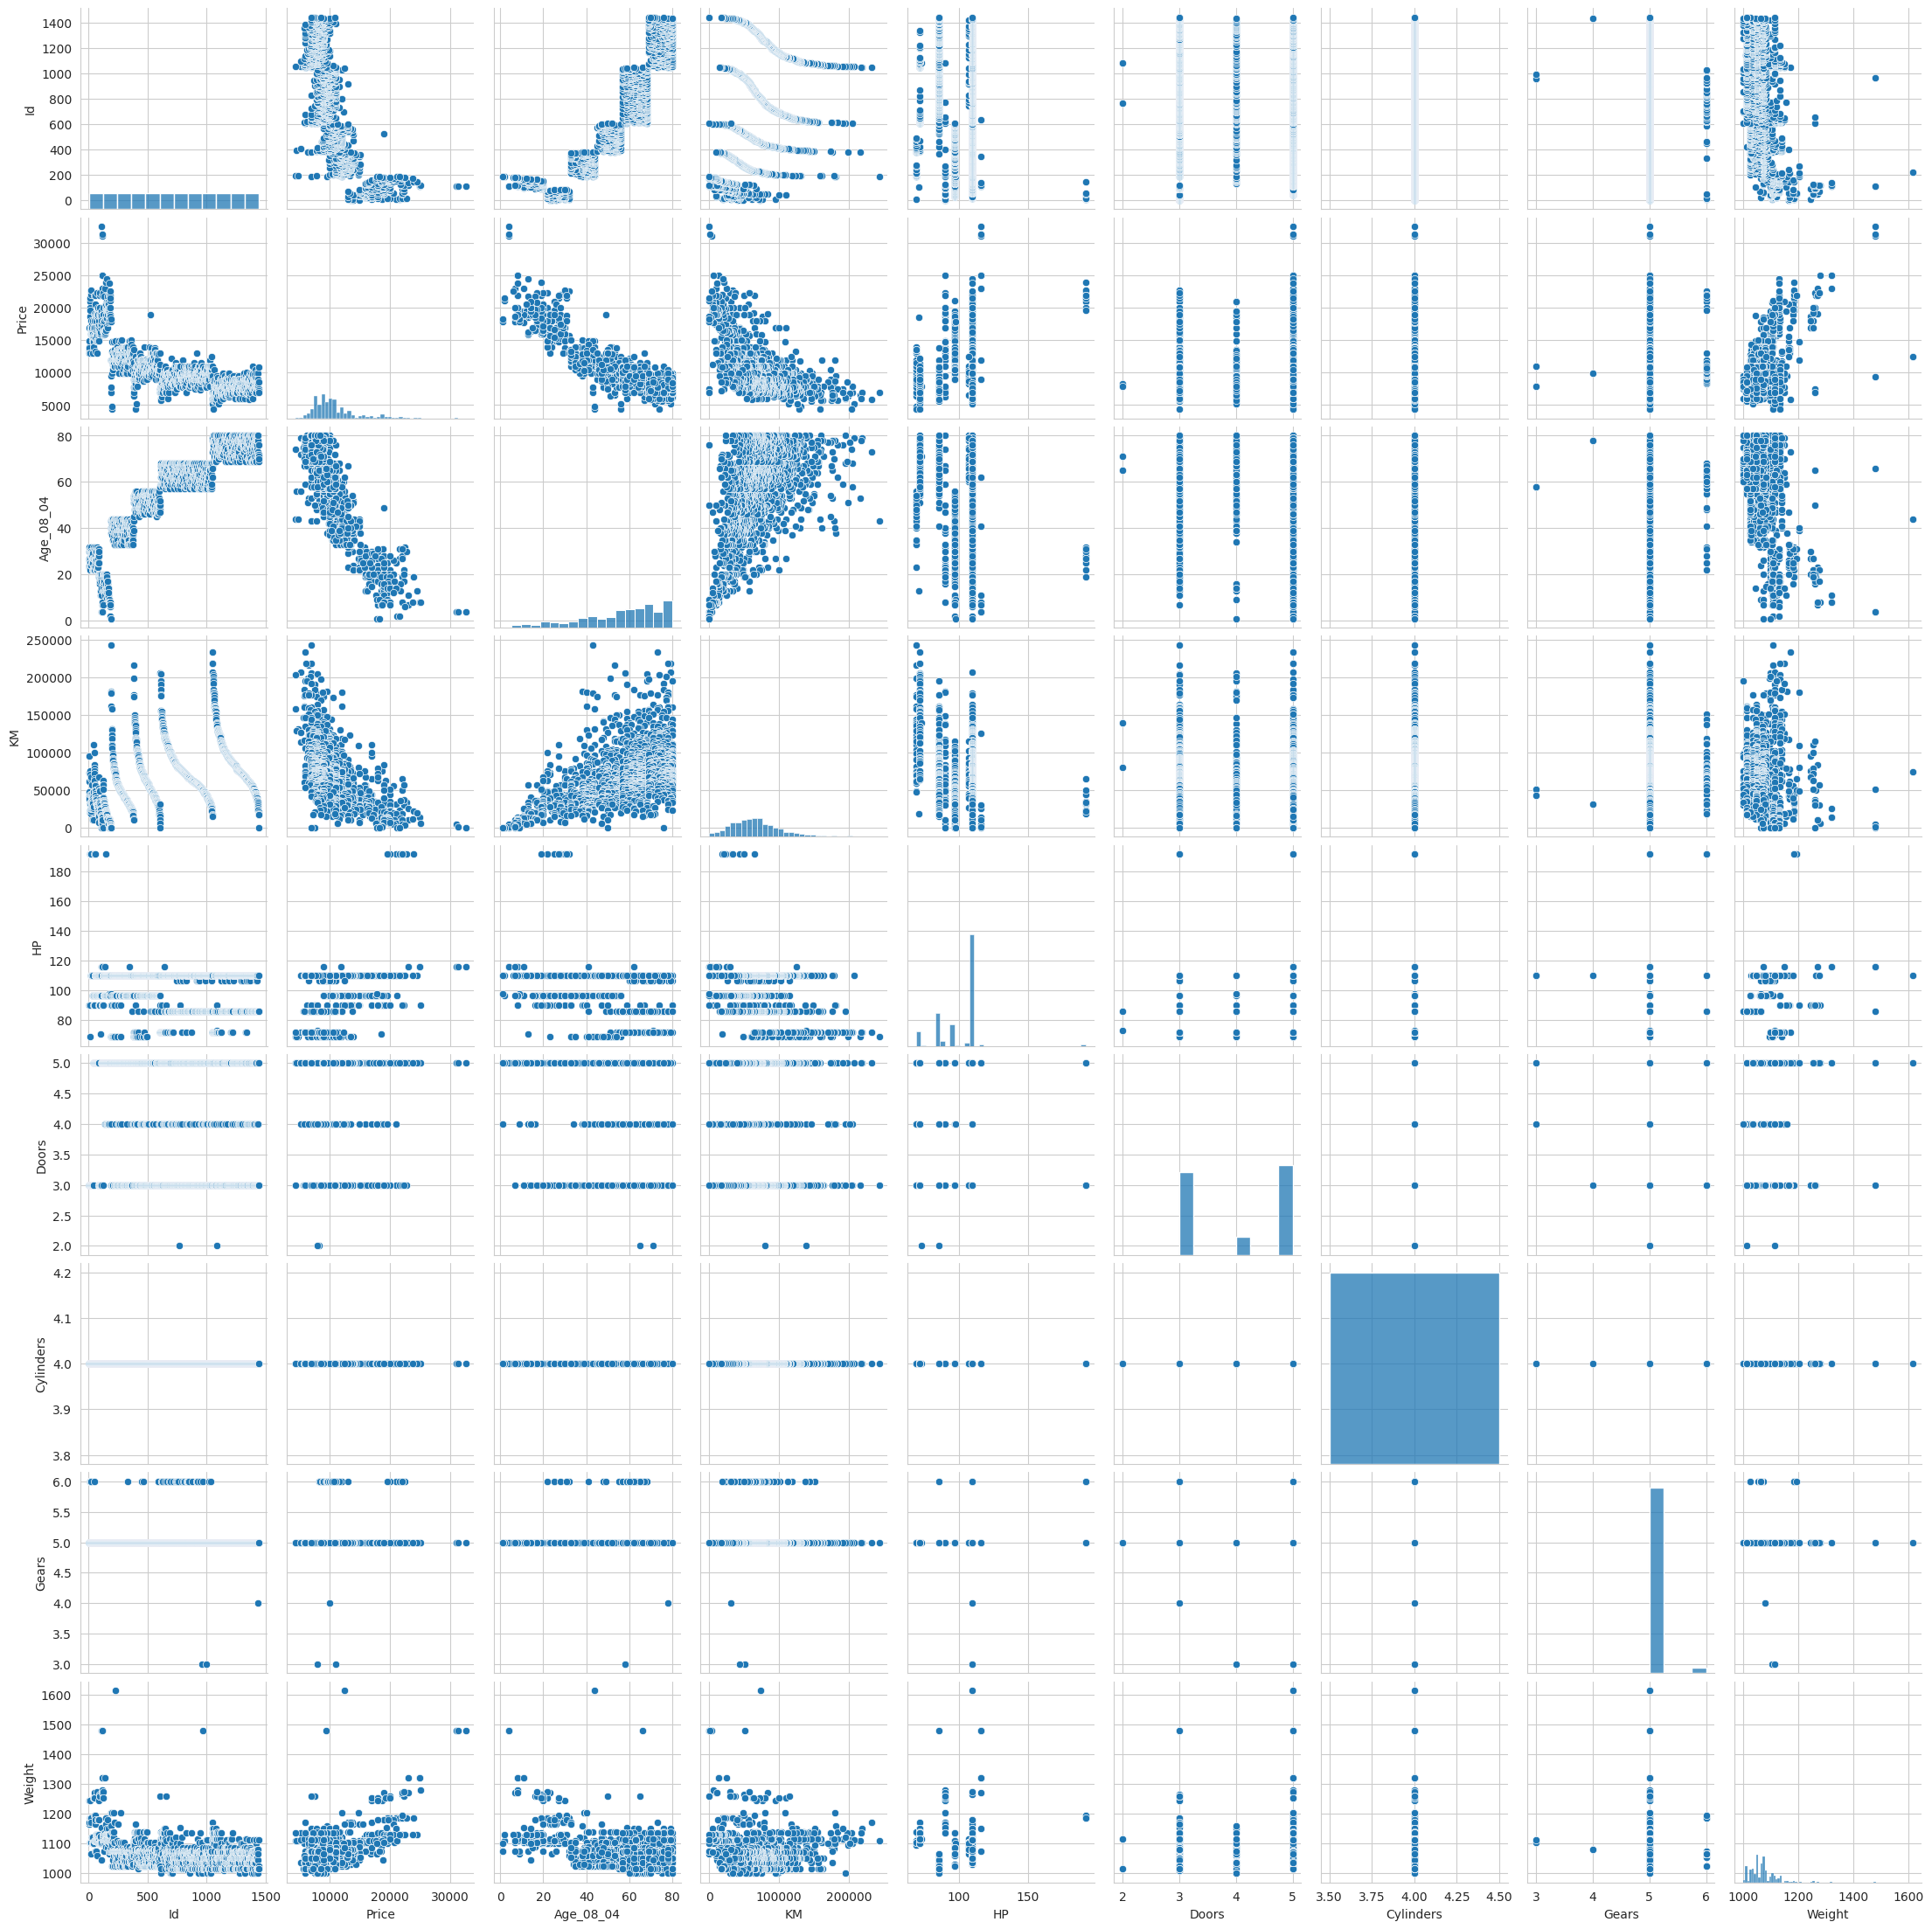

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df_cleaned)
plt.show()

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>],
       [<Axes: title={'center': 'KM'}>, <Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Doors'}>],
       [<Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

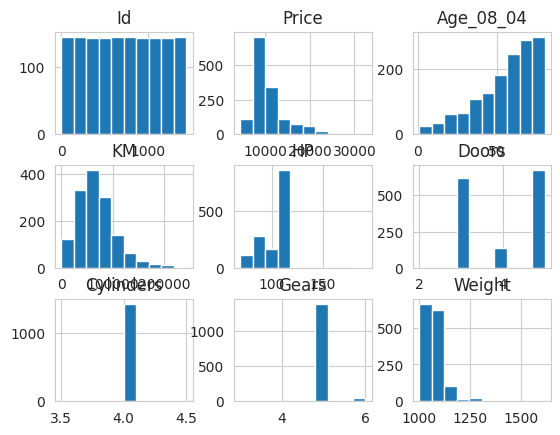

In [ ]:
df_cleaned.hist()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

print(df_cleaned.columns)

model = sm.OLS.from_formula('Price ~ Age_08_04 + KM + Doors + HP + Gears + Cylinders + Weight', data=df).fit()


Index(['Id', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears',
       'Weight'],
      dtype='object')


In [ ]:
model.params

,0
Intercept,-410.845504
Age_08_04,-122.242218
KM,-0.019994
Doors,-9.680229
HP,28.350149
Gears,622.282925
Cylinders,-1643.382016
Weight,18.609651


In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
Doors        -0.242055
HP           10.842418
Gears         3.152234
Cylinders    -5.323309
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
Doors         8.087723e-01
HP            2.231791e-26
Gears         1.653931e-03
Cylinders     1.181900e-07
Weight        7.856458e-96
dtype: float64


In [ ]:
(model.rsquared, model.rsquared_adj)

(0.8628024511073658, 0.8622263942190832)

In [ ]:
import statsmodels.formula.api as smf
ml_km = smf.ols('Price ~ KM', data=df_cleaned).fit()
print(ml_km.tvalues, ml_km.pvalues)

Intercept    88.510378
KM          -26.267601
dtype: float64 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [ ]:
ml_w = smf.ols('Price ~ Weight', data=df_cleaned).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


In [ ]:
ml_wv = smf.ols('Price ~ Weight + KM', data=df_cleaned).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept   -23.321256
Weight       35.865992
KM          -35.132111
dtype: float64 
 Intercept    3.044633e-102
Weight       1.380010e-201
KM           1.461103e-195
dtype: float64


In [ ]:
rsq_hp = smf.ols('HP ~ KM + Age_08_04 + Weight', data=df_cleaned).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)

rsq_km = smf.ols('KM ~ HP + Age_08_04 + Weight', data=df_cleaned).fit().rsquared
vif_km = 1 / (1 - rsq_km)

rsq_age = smf.ols('Age_08_04 ~ HP + KM + Weight', data=df_cleaned).fit().rsquared
vif_age = 1 / (1 - rsq_age)

rsq_weight = smf.ols('Weight ~ HP + KM + Age_08_04', data=df_cleaned).fit().rsquared
vif_weight = 1 / (1 - rsq_weight)

# Create a VIF DataFrame
d1 = {'Variables': ['HP', 'KM', 'Age_08_04', 'Weight'],
      'VIF': [vif_hp, vif_km, vif_age, vif_weight]}

VIF_frame = pd.DataFrame(d1)
print(VIF_frame)

   Variables       VIF
0         HP  1.139033
1         KM  1.614165
2  Age_08_04  1.873690
3     Weight  1.405564


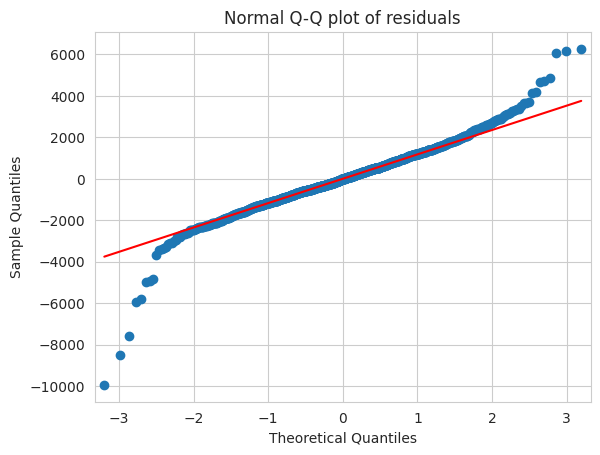

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   48,   49,   51,   52,
          53,   56,   58,   59,   61,   62,   63,   64,   65,   66,   68,
          69,   70,   72,   74,   75,   76,   77,   78,   80,   81,   83,
          84,   85,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  127,
         128,  134,  136,  138,  139,  141,  142,  143,  144,  146,  147,
         148,  149,  150,  151,  152,  153,  154,  156,  157,  158,  159,
         160,  161,  162,  163,  165,  166,  167,  168,  169,  170,  171,
         172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,
         183,  190,  194,  196,  197,  201,  204,  210,  211,  216,  223,
         230,  232,  233,  237,  238, 

In [ ]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

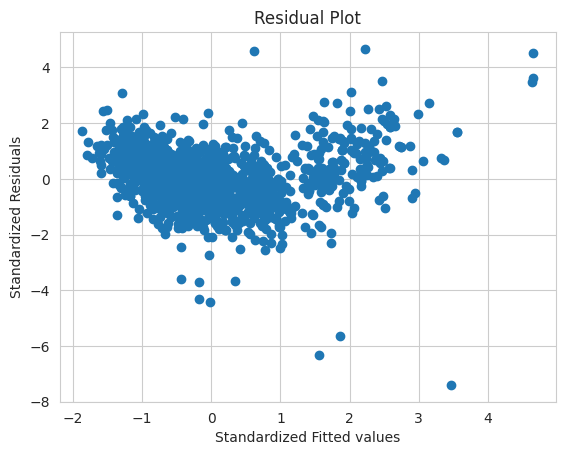

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residuals')
plt.show()

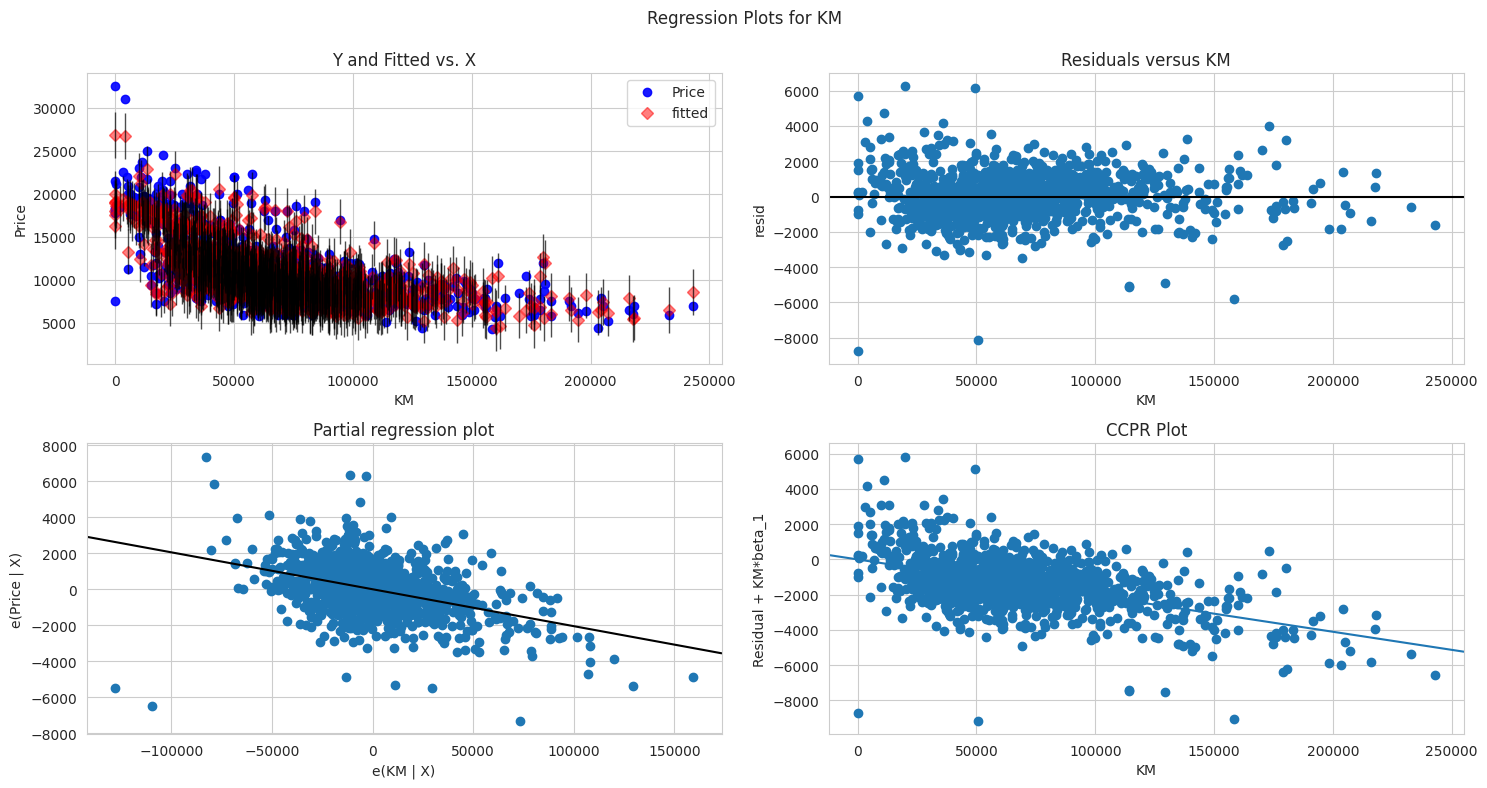

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
y = df_cleaned['Price']
X = df_cleaned[['Age_08_04', 'KM', 'Doors', 'HP', 'Gears', 'Cylinders', 'Weight']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

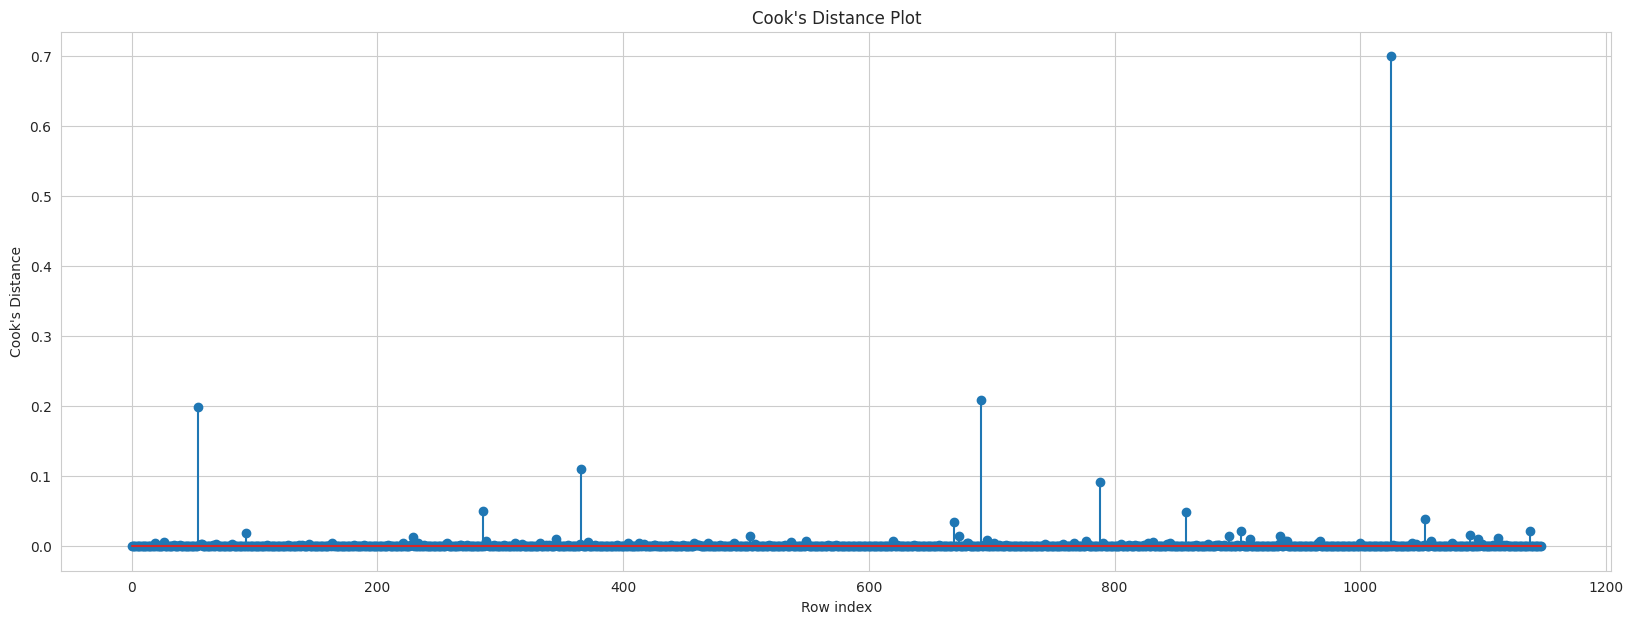

In [ ]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(X_train)), np.round(cooks_d, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()